## Machine Learning Approach

**Here are some things I am curious about, after exploring the data:**
1. Do any of the features strongly predict heart disease on their own?
2. Which combinations of features boost heart disease prediction the most?
3. Are any of the features less related...unless combined with others?

**But first, I need to select an appropriate machine learning algorithm.**

[These are the important considerations:](https://www.kdnuggets.com/2020/05/guide-choose-right-machine-learning-algorithm.html#:~:text=%20An%20easy%20guide%20to%20choose%20the%20right,time.%20Higher%20accuracy%20typically%20means%20higher...%20More%20)

1. *Size of the training data (small in this case)*

    if the training data is smal or if the dataset has a small number of observations/high number of features 
    choose algorithms with high bias/low variance like Linear regression, Naïve Bayes, or Linear SVM.
    
    If the training data is large and the number of observations is higher, compared to the number of 
    features, you can use low bias/high variance algorithms like KNN, Decision trees, or kernel SVM.
    

2. *Desired Accuracy and/or Interpretability of the output (interpretability in this case)*

    Accuracy of a model means that the function predicts a response value for a given observation, which is 
    close to the true response value for that observation. 
    
    A highly interpretable algorithm (restrictive models like Linear Regression) means that one can easily 
    understand how any individual predictor is associated with the response while the flexible models give 
    higher accuracy at the cost of low interpretability.
    
    
3.  *Speed or Training time (non-issue for this small dataset)*

    Higher accuracy typically means higher training time. Also, algorithms require more time to train on 
    large training data. In real-world applications, the choice of algorithm is driven by these two factors 
    predominantly.

    Algorithms like Naïve Bayes and Linear and Logistic regression are easy to implement and quick to run. 
    Algorithms like SVM, which involve tuning of parameters, Neural networks with high convergence time, and 
    random forests, need a lot of time to train the data.
    
    
4. *Linearity (to be determined)*

    The best way to find out the linearity is to either fit a linear line or run a logistic regression or SVM 
    and check for residual errors. A higher error means the data is not linear and would need complex 
    algorithms to fit.
    

5. *Number of features (small in this case)*

    The dataset may have a large number of features that may not all be relevant and significant. For a 
    certain type of data, such as genetics or textual, the number of features can be very large compared to 
    the number of data points.
    

6. *Supervised or Unsupervised learning (Supervised in this case)*

   Supervised learning algorithms are used when the training data has output variables corresponding to the 
   input variables. The algorithm analyses the input data and learns a function to map the relationship 
   between the input and output variables.
   
   Unspervised learning algorithms are used when the training data does not have a response variable. Such 
   algorithms try to find the intrinsic pattern and hidden structures in the data.

**I am going to start with a Linear or Logistic regression algorithm and evaluate whether the data is non-linear.**  

If non-linear, I will apply random forests (because they are easy to interpret).

[The choice between Linear or Logistic regression, depends on what type of output I am expecting:](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)

I am expecting to output a category (Logistic Regression): yes - heart disease or no - not heart disease.

I am not expecting to output a quantity (Linear Regression).

## Fit my data to a logistic regression model

[Instead of predicting exactly 0 or 1, logistic regression generates a probability—a value between 0 and 1, exclusive.](https://developers.google.com/machine-learning/crash-course/logistic-regression/video-lecture)



In [1]:
#import relevant libraries
import numpy as np
import pandas as pd

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score

In [2]:
#import the dataset
heart_data = pd.read_csv("data/heart.csv")

#preview the columns
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


**Prepare data for the model by:**
1. determining the target
2. separating the features from the label 
3. splitting out the training and testing sets

In [3]:
### Determine the target (y) and separate label (y) from features (X)
target = 'target'
y = heart_data[target]
X = heart_data.drop(target,axis=1)

**Split the data for model training, tuning, and evaluation**

60% - train set

20% - validation set

20% - test set

The training set is applied to train, or fit, your model.

The validation set is used for unbiased model evaluation during hyperparameter tuning.

The test set is needed for an unbiased evaluation of the final model.

In less complex cases, when you don’t have to tune hyperparameters, it’s okay to work with only the training and test sets.

In [4]:
### Split the heart dataset into a Training Set and a Testing Set (testing set = = test_size = 20% of data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7, stratify=y)

### Then split the Training Set, to set aside a Validation Set (validation set = test_size = 20% of data)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=7, stratify=y)


**train_size:** is the number that defines the size of the training set. 

**test_size** is the number that defines the size of the test set.

You should provide either train_size or test_size. 

If you provide a float, then it must be between 0.0 and 1.0 and will define the share of the dataset used.  If you provide an int, then it will represent the total number of the samples. 

The default value is None and then the default share of the dataset that will be used for testing is 0.25, or 25 percent.

**random_state** is the object that controls randomization during splitting. 

Set any non-negative value, to make your tests reproducible. The default value is None.

**Stratified splits** are desirable when you’re classifying an imbalanced dataset, a dataset with a significant difference in the number of samples that belong to distinct classes.

**[Train the model](https://realpython.com/train-test-split-python-data/)**

In [5]:
#create a variable called ml_model and use it to instantiate (call) the logistic regression classifer
logreg_model = LogisticRegression(max_iter=1000)

#fit the classifier to the training data - the training features and the training labels are passed in
logreg_model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

**Generate Predictions Using the Validation Set**

Reserve the Testing Set for evaluating predictions on the finalized Logistic Regression Model.

Generate the first round(s) of evaluating model performance, using the validation set.

In [6]:
#calling the predict command on the classifier and providing it with the parameters it needs to make predictions about
#which are the features in your testing dataset
log_predictions = logreg_model.predict(X_val)

[**Evaluate the Predictions**](https://stackabuse.com/overview-of-classification-methods-in-python-with-scikit-learn/#:~:text=The%20classification%20report%20is%20a%20Scikit-Learn%20built%20in,quick%20intuition%20of%20how%20your%20model%20is%20performing.)

[Logistic Regression outputs predictions about test data points on a binary scale, zero or one.](https://stackabuse.com/overview-of-classification-methods-in-python-with-scikit-learn/#:~:text=The%20classification%20report%20is%20a%20Scikit-Learn%20built%20in,quick%20intuition%20of%20how%20your%20model%20is%20performing.)

If the value of something is 0.5 or above, it is classified as belonging to class 1, while below 0.5 if is classified as belonging to 0.

Each of the features also has a label of only 0 or 1. 

Logistic regression is a linear classifier and therefore used when there is some sort of linear relationship between the data.

**Accuracy Score**

Accuracy score is the simplest way to evaluate how the model performs

In [7]:
#pass in the predictions against the ground truth labels which were stored in the validation set labels
print(accuracy_score(log_predictions, y_val))


0.8032786885245902


But, while it can give you a quick idea of how your classifier is performing, it is best used when the number of observations/examples in each class is roughly equivalent.

Because this doesn't happen very often, other metrics are better.

**Confusion Matrix and Classification Report**

The Confusion Matrix and [Classification Report](https://datascience.stackexchange.com/questions/64441/how-to-interpret-classification-report-of-scikit-learn) give more details about performance

In [8]:
print(confusion_matrix(log_predictions, y_val))

[[21  5]
 [ 7 28]]


The number of correct predictions for each class run on the diagonal from top-left to bottom-right.

In [9]:
print(classification_report(y_val,log_predictions))

              precision    recall  f1-score   support

           0       0.81      0.75      0.78        28
           1       0.80      0.85      0.82        33

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



The recall means "how many of this class you find over the whole number of element of this class"

The precision will be "how many are correctly classified among that class"

f1-score is an average of precision and recall.

The support is the number of occurence of the given class in your dataset.

**Area Under ROC Curve (AUC)**

This metric is only used binary classification problems. 

The area under the curve represents the model's ability to properly discriminate between negative and positive examples, between one class or another.

In [10]:
print(roc_auc_score(y_val,log_predictions))

0.7992424242424243


A 1.0 = all of the area falls under the curve and this represents a perfect classifier. 

In contrast, an AUC of 0.5 is basically as good as randomly guessing. 

**After fitting a basic Logistic model, the conclusion is that it is a fairly good predictor of heart disease (75%+ accuracy/precision).**

## [Determine Feature Importance](https://www.kaggle.com/dansbecker/permutation-importance)

What features have the biggest impact on predictions?

In [11]:
#import the eli5 library

import eli5 
from eli5.sklearn import PermutationImportance
from sklearn.svm import SVC

[eli5](https://eli5.readthedocs.io/en/latest/blackbox/permutation_importance.html) provides a way to compute feature importances for any black-box estimator by measuring how score decreases when a feature is not available.

The method is also known as “permutation importance” or “Mean Decrease Accuracy (MDA)”.

The idea is the following: feature importance can be measured by looking at how much any score we’re interested decreases when a feature is not available.

[this is another reference](https://medium.com/@lily_su/explaining-predictions-graphing-feature-importances-permutation-importances-with-eli5-partial-839b58eee962)

[and a third reference](https://medium.com/analytics-vidhya/why-should-i-trust-your-model-bdda6be94c6f)

In [35]:
perm = PermutationImportance(logreg_model, random_state=1).fit(X_val, y_val)
log_feat_importance = eli5.show_weights(perm, feature_names = X_val.columns.tolist())
log_feat_importance

Weight,Feature
0.0754 ± 0.0491,oldpeak
0.0656 ± 0.0207,ca
0.0525 ± 0.0382,sex
0.0492 ± 0.0207,thal
0.0230 ± 0.0262,exang
0.0197 ± 0.0814,cp
0.0164 ± 0.0293,slope
0.0164 ± 0.0359,thalach
0.0000 ± 0.0293,restecg
0 ± 0.0000,fbs


This result is showing the most important features (in green, from top to bottom) and the features that are less predictive (in pink).

The first number in each row shows how much model performance decreased with a random shuffling (in this case, using "accuracy" as the performance metric).

You'll occasionally see negative values for permutation importances.  This happens when the feature didn't matter (should have had an importance close to 0), but random chance caused the predictions on shuffled data to be more accurate. This is more common with small datasets, like the one in this example, because there is more room for luck/chance.

## Tune the Model ##

**[Examine the Learning Curve](https://vitalflux.com/learning-curves-explained-python-sklearn-example/)**

[A learning curve](https://realpython.com/train-test-split-python-data/), sometimes called a training curve, shows how the prediction score of training and validation sets depends on the number of training samples. It plots the optimal value of a model's loss function for a training set against this loss function evaluated on a validation data set. 

You can use learning_curve() to get this dependency, which can help you find out how much a machine learning model benefits from adding more training data and whether the estimator suffers more from a variance or bias error.  If both the validation score and the training score converge to a value that is too low with increasing size of the training set, it will not benefit much from more training data.

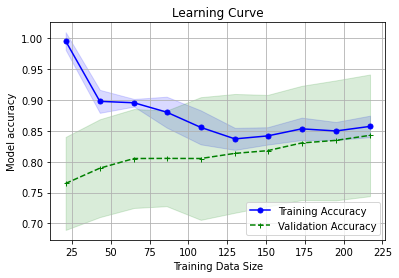

In [13]:
from sklearn.model_selection import learning_curve

# Use learning curve to get training and validation scores along with train sizes
train_sizes, train_scores, val_scores = learning_curve(estimator=logreg_model, X=X_train, y=y_train, cv=10, train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=1)

# Calculate training and test mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, val_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

I think that this result means that a training and validation set size of 130 is optimal.  It is where the learning curves for the two data sets are closest (converged).

My dataset is 303 samples.  If I split the training and validation sets into 130 samples, I'd have 43 samples left over for testing.  That's a very small number. 

One of the strategies I could use to generate more data is bagging and/or boosting the dataset.

[Hyperparameter tuning](https://realpython.com/train-test-split-python-data/), also called hyperparameter optimization, is the process of determining the best set of hyperparameters to define your machine learning model. sklearn.model_selection provides you with several options for this purpose, including GridSearchCV, RandomizedSearchCV, validation_curve(), and others. Splitting your data is also important for hyperparameter tuning.

## Implement Ensemble Learning 

At this stage, purely out of curiousity, I'd like to implement a Random Forest algorithm (classifier) and see how it compares to the Logsistic Regression model.

I can actually boost the accuracy of my predictions, by implementing both - in an [ensemble learning approach](https://youtu.be/m-S9Hojj1as).

![Ensemble Learning](images\Ensemble_Learning.png)

## Fit my data to a Random Forest model

A [decision tree](https://in.springboard.com/blog/decision-tree-implementation-in-python/) is a simple representation for classifying examples. 

It is a supervised machine learning technique where the data is continuously split according to a certain parameter. 

Decision tree analysis can help solve both classification & regression problems.

In [21]:
#import the relevant library
from sklearn.tree import DecisionTreeClassifier

**Create the Decision Tree classifier object**

In [22]:
dectree = DecisionTreeClassifier()

**Train Decision Tree Classifier on the Training Set**

In [29]:
dectree_model = dectree.fit(X_train,y_train)

**Make Predictions using the Validation Set**

In [30]:
dectree_predictions = dectree.predict(X_val)

**Evaluate the Decision Tree Model**

In [31]:
#print the accuracy score
print(accuracy_score(dectree_predictions, y_val))

0.7049180327868853


In [32]:
print(confusion_matrix(dectree_predictions, y_val))

[[19  9]
 [ 9 24]]


In [33]:
print(classification_report(y_val,dectree_predictions))

              precision    recall  f1-score   support

           0       0.68      0.68      0.68        28
           1       0.73      0.73      0.73        33

    accuracy                           0.70        61
   macro avg       0.70      0.70      0.70        61
weighted avg       0.70      0.70      0.70        61



**The decision tree performs less well than logistic regression!**

**Determine Feature Importance**

In [36]:
perm = PermutationImportance(dectree_model, random_state=1).fit(X_val, y_val)
dectree_feat_importance = eli5.show_weights(perm, feature_names = X_val.columns.tolist())
dectree_feat_importance

Weight,Feature
0.0492 ± 0.0776,cp
0.0459 ± 0.0636,ca
0.0459 ± 0.0981,oldpeak
0.0230 ± 0.0491,exang
0.0131 ± 0.0482,chol
0.0066 ± 0.0262,thal
0.0066 ± 0.0161,sex
0 ± 0.0000,restecg
0 ± 0.0000,fbs
-0.0033 ± 0.0382,age


Compare to Logistic Regression Feature Importance

In [38]:
log_feat_importance

Weight,Feature
0.0754 ± 0.0491,oldpeak
0.0656 ± 0.0207,ca
0.0525 ± 0.0382,sex
0.0492 ± 0.0207,thal
0.0230 ± 0.0262,exang
0.0197 ± 0.0814,cp
0.0164 ± 0.0293,slope
0.0164 ± 0.0359,thalach
0.0000 ± 0.0293,restecg
0 ± 0.0000,fbs


You can see that the two different models placed differing weights of importance on the features.

Thalach (maxiumum heart rate) and cholestrol weighted very differently in the two models.

This is a very interesting finding, because if I had only used Logistic Regression, I would have proceeded to drop the least important features to improve accuracy.

This demonstrates - especially because I have a small data set (303 samples) - that ensemble learning will give better accuracy.

## [Use Bagging Technique to Combine Logistic Regression and Decision Tree Models](https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-for-ensemble-models/#:~:text=%20Advanced%20Ensemble%20techniques%20%201%203.1%20Stacking.,of%20multiple%20models%20%28for%20instance%2C%20all...%20More%20)